In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import ast
import scipy.stats

In [6]:
master_path = "~/490_capstone/DAT-490-Capstone/df_master.csv"

df_master = pd.read_csv(master_path)

In [7]:
df = df_master
df2 = df

In [8]:
df['CRASH_TIME'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M:%S')

In [9]:
df['CRASH_HOUR'] = df['CRASH_TIME'].dt.hour
df_injured = df[df['OUTPUT'] == 'Injured']
new_df = df_injured.groupby('CRASH_HOUR').size().reset_index(name='Injured_Count')

df_merged = pd.merge(df, new_df, on='CRASH_HOUR', how='left')

In [10]:
#Killed
df['CRASH_HOUR'] = df['CRASH_TIME'].dt.hour
df_Killed = df[df['OUTPUT'] == 'Killed']
new_df = df_Killed.groupby('CRASH_HOUR').size().reset_index(name='Killed_Count')

df_merged = pd.merge(df_merged, new_df, on='CRASH_HOUR', how='left')

In [11]:
#unspecificed
df['CRASH_HOUR'] = df['CRASH_TIME'].dt.hour
df_Unspecified = df[df['OUTPUT'] == 'Unspecified']
new_df = df_Unspecified.groupby('CRASH_HOUR').size().reset_index(name='Unspecified_Count')

df_merged = pd.merge(df_merged, new_df, on='CRASH_HOUR', how='left')

In [35]:
data = df_merged

# Calculate the new column 'Injury_to_Fatality_Ratio'
# Using np.where to avoid division by zero issues
data['Injury_Ratio'] = np.where(data['Unspecified_Count'] != 0, 
                                            100*data['Injured_Count'] / (data['Unspecified_Count']+data['Injured_Count']+data['Killed_Count']), 
                                            np.nan)  # You can replace np.nan with another value as needed
data['Kill_Ratio'] = np.where(data['Unspecified_Count'] != 0, 
                                            100*data['Killed_Count'] / (data['Unspecified_Count']+data['Injured_Count']+data['Killed_Count']), 
                                            np.nan)  # You can replace np.nan with another value as needed

In [36]:
df_merged

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,...,NUM_VEHICLES,OUTPUT,CRASH_HOUR,Injured_Count,Killed_Count,Unspecified_Count,Injury_Ratio,Kill_Ratio,FIRST_PRE_CRASH,Injured
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",unspecified,unspecified,4456314,...,1,Unspecified,9,7003,22,24476,22.231040,0.069839,Parked,0
1,2021-12-14,1900-01-01 08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",unspecified,unspecified,4486660,...,2,Injured,8,8161,27,25358,24.327789,0.080486,Going Straight Ahead,1
2,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",passing too closely,unspecified,4486519,...,2,Unspecified,14,10246,29,32779,23.798021,0.067357,Changing Lanes,0
3,2021-12-14,1900-01-01 16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",turning improperly,unspecified,4487127,...,2,Unspecified,16,11385,39,34419,24.834762,0.085073,Going Straight Ahead,0
4,2021-12-14,1900-01-01 23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",reaction to uninvolved vehicle,unspecified,4486635,...,2,Injured,23,5053,39,11659,30.165363,0.232822,Going Straight Ahead,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,2024-02-23,1900-01-01 12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",unspecified,unspecified,4705614,...,1,Unspecified,12,7985,31,27045,22.774593,0.088417,Going Straight Ahead,0
628348,2024-02-25,1900-01-01 08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",driver inattention/distraction,unspecified,4705193,...,2,Unspecified,8,8161,27,25358,24.327789,0.080486,Parked,0
628349,2024-02-25,1900-01-01 14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",failure to yield right-of-way,unspecified,4705104,...,2,Injured,14,10246,29,32779,23.798021,0.067357,Going Straight Ahead,1
628350,2024-02-21,1900-01-01 12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",unspecified,unspecified,4705537,...,1,Unspecified,12,7985,31,27045,22.774593,0.088417,Parked,0


R-squared for the model: 0.02689760825816212
RMSE for the model: 0.0713880317750075
Pearson correlation coefficient: 0.1640049031528083


In [19]:
'CRASH_HOUR','NUM_VEHICLES','AVERAGE_AGE','NUM_PEOPLE','Injury_Ratio','Kill_Ratio'

('CRASH_HOUR',
 'NUM_VEHICLES',
 'AVERAGE_AGE',
 'NUM_PEOPLE',
 'Injury_Ratio',
 'Kill_Ratio')

In [20]:

df_merged['FIRST_PRE_CRASH'] = df_merged['PRE_CRASH'].apply(lambda x: ast.literal_eval(x)[0] if x else None)
#df_merged['FIRST_safety'] = df_merged['SAFETY_EQUIPMENT'].apply(lambda x: ast.literal_eval(x)[0] if x else None)
#df_merged['Non_Unknown_Count'] = df_merged['SAFETY_EQUIPMENT'].apply(lambda x: sum(1 for item in ast.literal_eval(x) if item.lower() != "unknown") if x else 0)
df_merged['Injured'] = df_merged['OUTPUT'].apply(lambda x: 1 if x == 'Injured' else (2 if x == "killed" or x == "Killed" else 0))


In [21]:
df_merged

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,...,NUM_VEHICLES,OUTPUT,CRASH_HOUR,Injured_Count,Killed_Count,Unspecified_Count,Injury_Ratio,Kill_Ratio,FIRST_PRE_CRASH,Injured
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",unspecified,unspecified,4456314,...,1,Unspecified,9,7003,22,24476,22.231040,0.069839,Parked,0
1,2021-12-14,1900-01-01 08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",unspecified,unspecified,4486660,...,2,Injured,8,8161,27,25358,24.327789,0.080486,Going Straight Ahead,1
2,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",passing too closely,unspecified,4486519,...,2,Unspecified,14,10246,29,32779,23.798021,0.067357,Changing Lanes,0
3,2021-12-14,1900-01-01 16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",turning improperly,unspecified,4487127,...,2,Unspecified,16,11385,39,34419,24.834762,0.085073,Going Straight Ahead,0
4,2021-12-14,1900-01-01 23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",reaction to uninvolved vehicle,unspecified,4486635,...,2,Injured,23,5053,39,11659,30.165363,0.232822,Going Straight Ahead,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,2024-02-23,1900-01-01 12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",unspecified,unspecified,4705614,...,1,Unspecified,12,7985,31,27045,22.774593,0.088417,Going Straight Ahead,0
628348,2024-02-25,1900-01-01 08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",driver inattention/distraction,unspecified,4705193,...,2,Unspecified,8,8161,27,25358,24.327789,0.080486,Parked,0
628349,2024-02-25,1900-01-01 14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",failure to yield right-of-way,unspecified,4705104,...,2,Injured,14,10246,29,32779,23.798021,0.067357,Going Straight Ahead,1
628350,2024-02-21,1900-01-01 12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",unspecified,unspecified,4705537,...,1,Unspecified,12,7985,31,27045,22.774593,0.088417,Parked,0


In [22]:
df_dum_pre_crash = df_merged[['Injury_Ratio','FIRST_PRE_CRASH']]
df_dum_pre_crash
df_dum_pre_crash = pd.get_dummies(df_dum_pre_crash, columns=['FIRST_PRE_CRASH'], drop_first=True)
df_dum_pre_crash

,Injury_Ratio,FIRST_PRE_CRASH_Backing,FIRST_PRE_CRASH_Changing Lanes,FIRST_PRE_CRASH_Entering Parked Position,FIRST_PRE_CRASH_Going Straight Ahead,FIRST_PRE_CRASH_Making Left Turn,FIRST_PRE_CRASH_Making Left Turn on Red,FIRST_PRE_CRASH_Making Right Turn,FIRST_PRE_CRASH_Making Right Turn on Red,FIRST_PRE_CRASH_Making U Turn,FIRST_PRE_CRASH_Merging,FIRST_PRE_CRASH_Other,FIRST_PRE_CRASH_Parked,FIRST_PRE_CRASH_Passing,FIRST_PRE_CRASH_Police Pursuit,FIRST_PRE_CRASH_Slowing or Stopping,FIRST_PRE_CRASH_Starting from Parking,FIRST_PRE_CRASH_Starting in Traffic,FIRST_PRE_CRASH_Stopped in Traffic
0,22.231040,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,24.327789,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,23.798021,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,24.834762,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,30.165363,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,22.774593,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
628348,24.327789,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
628349,23.798021,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
628350,22.774593,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [23]:
data=df_dum_pre_crash
X = data.drop('Injury_Ratio', axis=1)
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.005272739996625142
RMSE for the model: 2.801993310082379
Pearson correlation coefficient: 0.07261363505998607


In [24]:
df_dum_pre_crash = df_merged[['Injury_Ratio','FIRST_PRE_CRASH']]

df_dum_pre_crash = pd.get_dummies(df_dum_pre_crash, columns=['FIRST_PRE_CRASH'], drop_first=True)
df_dum_pre_crash.head()

,Injury_Ratio,FIRST_PRE_CRASH_Backing,FIRST_PRE_CRASH_Changing Lanes,FIRST_PRE_CRASH_Entering Parked Position,FIRST_PRE_CRASH_Going Straight Ahead,FIRST_PRE_CRASH_Making Left Turn,FIRST_PRE_CRASH_Making Left Turn on Red,FIRST_PRE_CRASH_Making Right Turn,FIRST_PRE_CRASH_Making Right Turn on Red,FIRST_PRE_CRASH_Making U Turn,FIRST_PRE_CRASH_Merging,FIRST_PRE_CRASH_Other,FIRST_PRE_CRASH_Parked,FIRST_PRE_CRASH_Passing,FIRST_PRE_CRASH_Police Pursuit,FIRST_PRE_CRASH_Slowing or Stopping,FIRST_PRE_CRASH_Starting from Parking,FIRST_PRE_CRASH_Starting in Traffic,FIRST_PRE_CRASH_Stopped in Traffic
0,22.231040,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,24.327789,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,23.798021,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,24.834762,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,30.165363,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:

data=df_dum_pre_crash
X = data.drop('Injury_Ratio', axis=1)
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.005272739996625142
RMSE for the model: 2.801993310082379
Pearson correlation coefficient: 0.07261363505998607


In [30]:
data=df_merged
X = data[['CRASH_HOUR']]
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

R-squared for the model: 0.20533733052067726
RMSE for the model: 2.5044161176150443


R-squared for the model: 0.20533733052067726
RMSE for the model: 2.5044161176150443


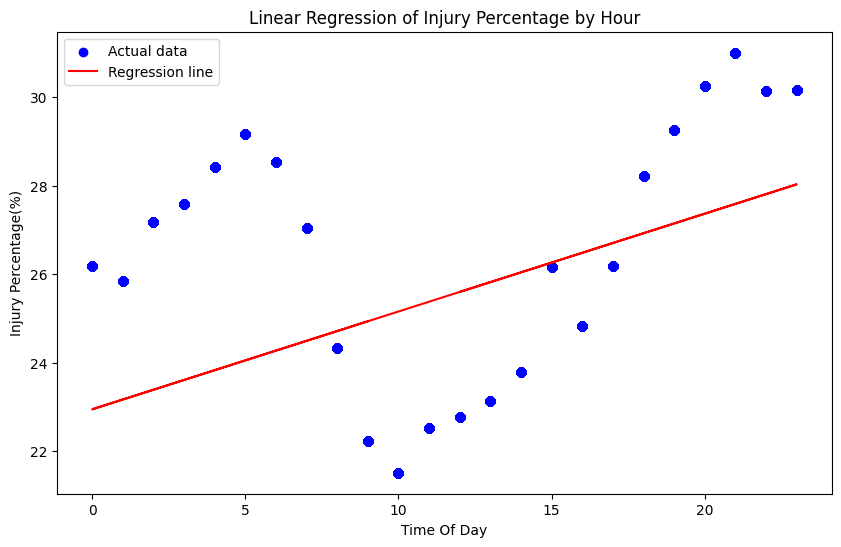

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_merged is your DataFrame, and it's already been loaded
data = df_merged
X = data[['CRASH_HOUR']]
y = data['Injury_Ratio']

model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = model.score(X, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R-squared and RMSE
print('R-squared for the model:', r_squared)
print('RMSE for the model:', rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.title('Linear Regression of Injury Percentage by Hour')
plt.xlabel('Time Of Day')
plt.ylabel('Injury Percentage(%)')
plt.legend()
plt.show()

In [32]:
data=df_merged
X = data[['CRASH_HOUR']]
y = data['Kill_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

R-squared for the model: 0.02689760825816212
RMSE for the model: 0.0713880317750075


R-squared for the model: 0.02689760825816212
RMSE for the model: 0.0713880317750075


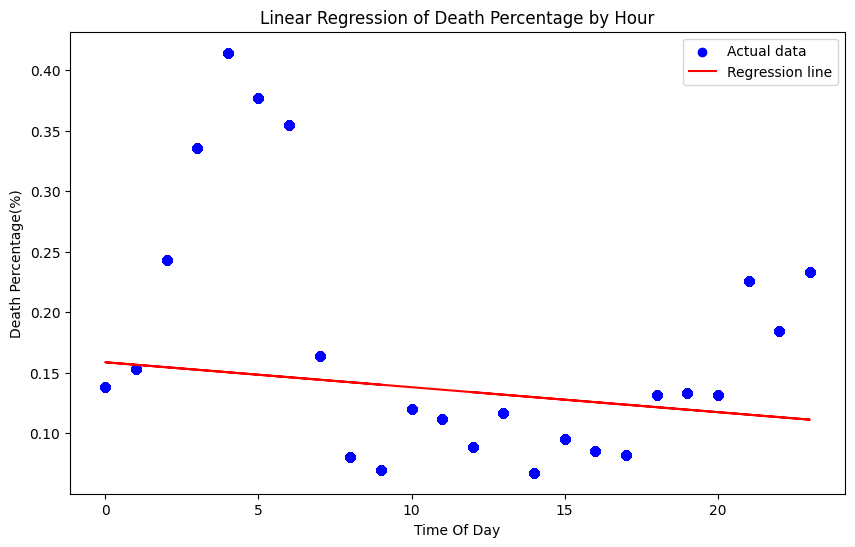

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_merged is your DataFrame, and it's already been loaded
data = df_merged
X = data[['CRASH_HOUR']]
y = data['Kill_Ratio']

model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = model.score(X, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R-squared and RMSE
print('R-squared for the model:', r_squared)
print('RMSE for the model:', rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.title('Linear Regression of Death Percentage by Hour')
plt.xlabel('Time Of Day')
plt.ylabel('Death Percentage(%)')
plt.legend()
plt.show()

In [ ]:
#heat map

In [206]:
import seaborn as sns

In [207]:
# Select only numerical columns from the DataFrame
numerical_data = df_merged.select_dtypes(include=[np.number])


# Compute the correlation matrix for numerical columns only
corr_matrix = numerical_data.corr()
print(corr_matrix)

                          ZIP CODE  LATITUDE  LONGITUDE  COLLISION_ID  \
ZIP CODE                  1.000000 -0.497998   0.487575      0.036597   
LATITUDE                 -0.497998  1.000000   0.285054      0.001544   
LONGITUDE                 0.487575  0.285054   1.000000      0.022380   
COLLISION_ID              0.036597  0.001544   0.022380      1.000000   
LARGE_VEHICLE            -0.014079  0.006852  -0.018292     -0.001032   
TWO_WHEEL_VEHICLE        -0.026305  0.012903  -0.051856      0.125774   
AVERAGE_AGE              -0.006759 -0.012068   0.000037     -0.013149   
AVERAGE_SEX               0.096020 -0.046615   0.088095     -0.002667   
PED_PRESENT              -0.005645  0.004739  -0.009478      0.046836   
CYC_PRESENT              -0.033418  0.003672  -0.054480      0.065365   
EJECTED                  -0.009006  0.000688  -0.034030      0.064650   
NUM_PEOPLE                0.056850 -0.005237   0.060980     -0.051624   
VEHICLE_OCCUPANTS         0.013956  0.011023   0.02

In [208]:
numerical_data

,ZIP CODE,LATITUDE,LONGITUDE,COLLISION_ID,LARGE_VEHICLE,TWO_WHEEL_VEHICLE,AVERAGE_AGE,AVERAGE_SEX,PED_PRESENT,CYC_PRESENT,...,NUM_VEHICLES,CRASH_HOUR,Injured_Count,Killed_Count,Unspecified_Count,Injury_to_Fatality_Ratio,Injury_Ratio,Kill_Ratio,Non_Unknown_Count,Injured
0,11208,40.667202,-73.866500,4456314,0,0,28.000000,1.000000,0,0,...,1,9,7003,22,24476,0.003142,0.222310,0.000698,0,0
1,10475,40.868160,-73.831480,4486660,0,0,34.000000,0.666667,0,0,...,2,8,8161,27,25358,0.003308,0.243278,0.000805,2,1
2,10017,40.751440,-73.973970,4486519,0,0,29.500000,0.000000,0,0,...,2,14,10246,29,32779,0.002830,0.237980,0.000674,2,0
3,11413,40.675884,-73.755770,4487127,0,0,46.000000,0.500000,0,0,...,2,16,11385,39,34419,0.003426,0.248348,0.000851,2,0
4,11434,40.666840,-73.789410,4486635,0,0,34.500000,0.750000,0,0,...,2,23,5053,39,11659,0.007718,0.301654,0.002328,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,10459,40.820972,-73.892845,4705614,0,0,52.333333,0.333333,0,0,...,1,12,7985,31,27045,0.003882,0.227746,0.000884,2,0
628348,11211,40.706276,-73.955060,4705193,0,0,36.000000,0.000000,0,0,...,2,8,8161,27,25358,0.003308,0.243278,0.000805,0,0
628349,11370,40.773808,-73.892900,4705104,0,0,38.400000,0.600000,0,0,...,2,14,10246,29,32779,0.002830,0.237980,0.000674,0,1
628350,11207,40.657660,-73.897050,4705537,0,0,37.666667,1.000000,0,0,...,1,12,7985,31,27045,0.003882,0.227746,0.000884,0,0


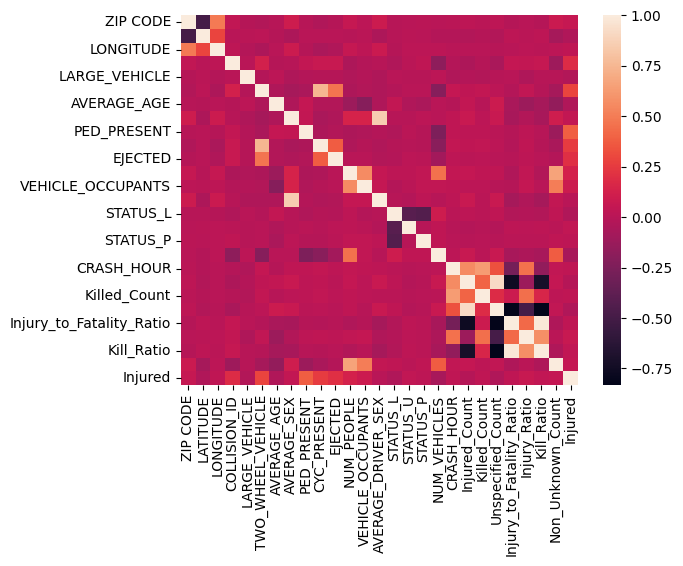

In [209]:
sns.heatmap(numerical_data.corr());

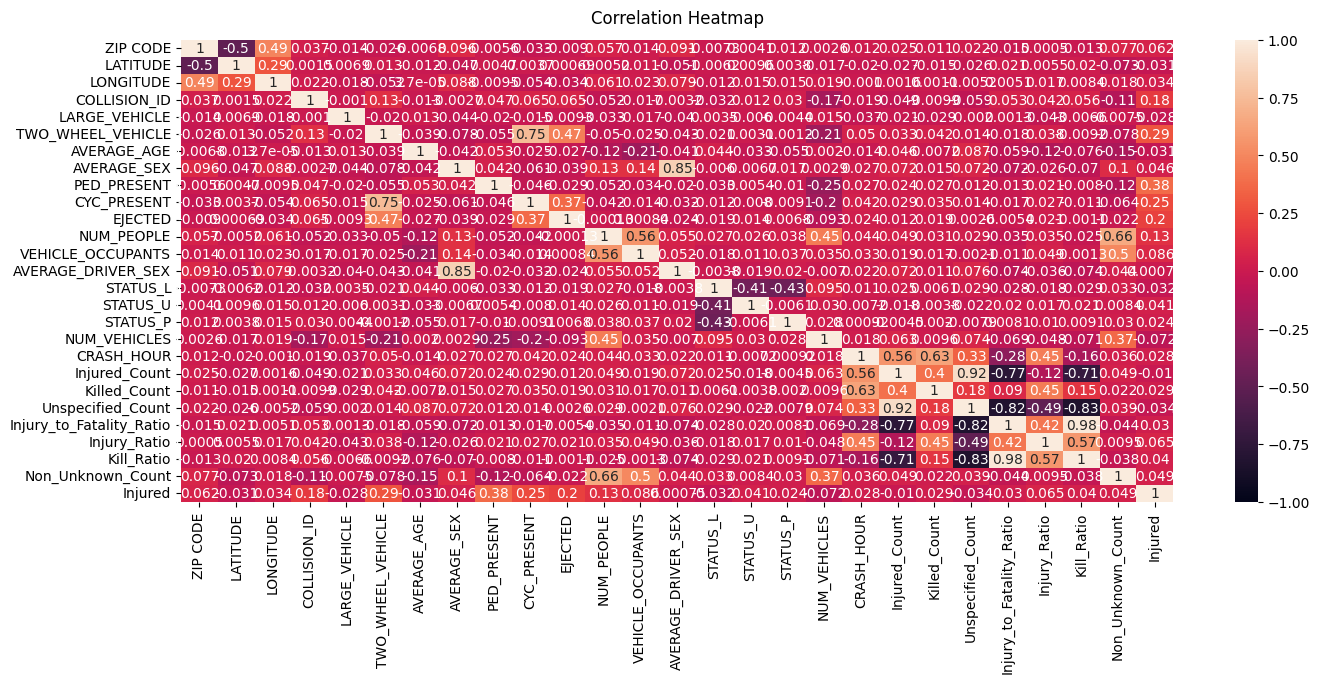

In [210]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [241]:
# Create a new DataFrame with only the specified columns
selected_data = numerical_data[['CRASH_HOUR','NUM_VEHICLES','AVERAGE_AGE','NUM_PEOPLE','Injury_Ratio','Kill_Ratio']]

selected_data

,CRASH_HOUR,NUM_VEHICLES,AVERAGE_AGE,NUM_PEOPLE,Injury_Ratio,Kill_Ratio
0,9,1,28.000000,2,0.222310,0.000698
1,8,2,34.000000,3,0.243278,0.000805
2,14,2,29.500000,2,0.237980,0.000674
3,16,2,46.000000,4,0.248348,0.000851
4,23,2,34.500000,4,0.301654,0.002328
...,...,...,...,...,...,...
628347,12,1,52.333333,3,0.227746,0.000884
628348,8,2,36.000000,4,0.243278,0.000805
628349,14,2,38.400000,5,0.237980,0.000674
628350,12,1,37.666667,3,0.227746,0.000884


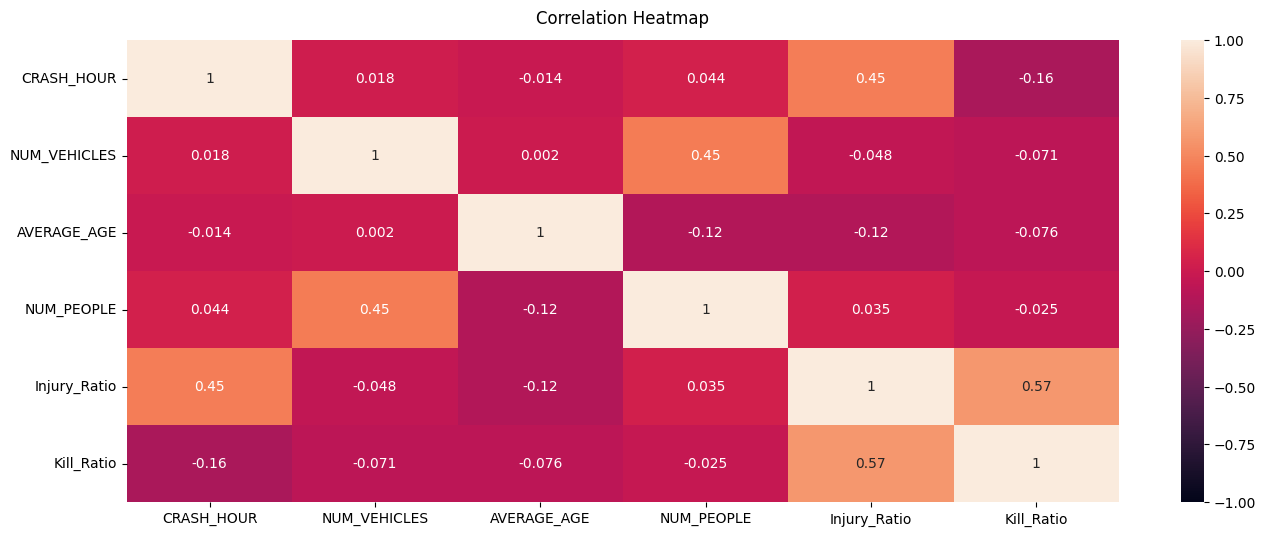

In [242]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(selected_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [243]:
# Compute the correlation matrix for numerical columns only
corr_matrix = selected_data.corr()
print(corr_matrix)

              CRASH_HOUR  NUM_VEHICLES  AVERAGE_AGE  NUM_PEOPLE  Injury_Ratio  \
CRASH_HOUR      1.000000      0.017892    -0.014226    0.044159      0.453142   
NUM_VEHICLES    0.017892      1.000000     0.002039    0.451897     -0.047524   
AVERAGE_AGE    -0.014226      0.002039     1.000000   -0.118291     -0.118258   
NUM_PEOPLE      0.044159      0.451897    -0.118291    1.000000      0.035149   
Injury_Ratio    0.453142     -0.047524    -0.118258    0.035149      1.000000   
Kill_Ratio     -0.164005     -0.070534    -0.075719   -0.025156      0.572704   

              Kill_Ratio  
CRASH_HOUR     -0.164005  
NUM_VEHICLES   -0.070534  
AVERAGE_AGE    -0.075719  
NUM_PEOPLE     -0.025156  
Injury_Ratio    0.572704  
Kill_Ratio      1.000000  


In [213]:
selected_data.corr()

,Injury_Ratio,CRASH_HOUR,Injury_to_Fatality_Ratio,Kill_Ratio,CYC_PRESENT,EJECTED,NUM_PEOPLE
Injury_Ratio,1.000000,0.453142,0.424480,0.572704,0.026962,0.021011,0.035149
CRASH_HOUR,0.453142,1.000000,-0.281316,-0.164005,0.041550,0.023907,0.044159
Injury_to_Fatality_Ratio,0.424480,-0.281316,1.000000,0.983764,-0.017078,-0.005391,-0.035168
Kill_Ratio,0.572704,-0.164005,0.983764,1.000000,-0.010731,-0.001063,-0.025156
CYC_PRESENT,0.026962,0.041550,-0.017078,-0.010731,1.000000,0.373072,-0.041594
EJECTED,0.021011,0.023907,-0.005391,-0.001063,0.373072,1.000000,-0.000128
NUM_PEOPLE,0.035149,0.044159,-0.035168,-0.025156,-0.041594,-0.000128,1.000000


In [15]:
data=df_merged
X = data[['CRASH_HOUR']]
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.20533733052067726
RMSE for the model: 2.5044161176150443
Pearson correlation coefficient: 0.45314162302825445


In [16]:
data=df_merged
X = data[['AVERAGE_AGE']]
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.013984875040288891
RMSE for the model: 2.789695954308214
Pearson correlation coefficient: 0.11825766376979094


In [17]:
data=df_merged
X = data[['NUM_VEHICLES']]
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.0022585515197584005
RMSE for the model: 2.8062353510754527
Pearson correlation coefficient: 0.047524220348766216


In [18]:
data=df_merged
X = data[['NUM_PEOPLE']]
y = data['Injury_Ratio']
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
correlation, _ = scipy.stats.pearsonr(y, y_pred)

# Output R²
print('R-squared for the model:', r_squared)

# Output RMSE
print('RMSE for the model:', rmse)

# Output Pearson correlation coefficient
print('Pearson correlation coefficient:', correlation)

R-squared for the model: 0.0012354598450913246
RMSE for the model: 2.807673749976677
Pearson correlation coefficient: 0.035149108738230087
